In [2]:
from sklearn.datasets import fetch_openml

In [3]:
MNIST = fetch_openml("mnist_784", version=1)

In [4]:
MNIST.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
data = MNIST["data"]
labels = MNIST["target"]

In [6]:
data.shape

(70000, 784)

In [7]:
labels.shape

(70000,)

In [8]:
import numpy as np
labels = labels.astype(np.uint8)

# Split Train Test Sets
MNIST is shuffled and splitted such as the first 60000 sample is the train set and the last 10000 is the testset

In [9]:
split_index = 60000

train_set = data[:split_index]
test_set = data[split_index:]

train_labels = labels[:split_index]
test_labels = labels[split_index:]

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

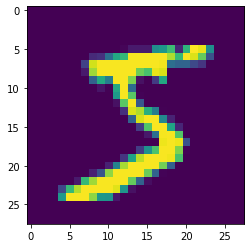

In [11]:
sample = train_set.to_numpy()[0]
sample_image = sample.reshape(28,28)
plt.imshow(sample_image)
plt.show()

In [12]:
labels

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: uint8

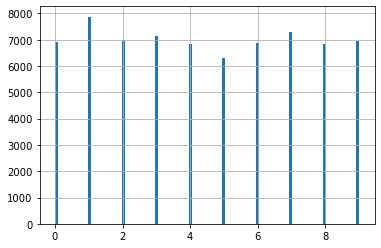

In [13]:
labels.hist(bins=100)

In [14]:
labels.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

# SGD Classifier
a simple SGDClassifier, which is a linear model. All it
does is assign a weight per class to each pixel, and when it sees a new image it just
sums up the weighted pixel intensities to get a score for each class

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
# SGD is linear classifier for binay classification, we have multiclass (10 classes) so it trains 10 of SGDs
sgd_clf = SGDClassifier(random_state=42)

In [17]:
sgd_clf.fit(train_set, train_labels)

SGDClassifier(random_state=42)

In [18]:
some_samples = test_set.iloc[:5]
some_labels = test_labels.iloc[:5]
predictions = sgd_clf.predict(some_samples)
predictions

array([7, 2, 1, 0, 4], dtype=uint8)

In [19]:
some_labels

60000    7
60001    2
60002    1
60003    0
60004    4
Name: class, dtype: uint8

In [20]:
predictions_test_set = sgd_clf.predict(test_set)

# Evaluation Confusion Matrix
Each row represents the class itself
,Each column represents the predictions fo that class
,Diagonal should be maximum (idealy = num of occerunce of that class) to make good evaluation

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
conf_matrix = confusion_matrix(y_true=test_labels, y_pred=predictions_test_set)

In [23]:
conf_matrix

array([[ 902,    0,    8,   11,    1,   13,    2,    4,   39,    0],
       [   0, 1095,    2,    3,    0,    2,    4,    1,   28,    0],
       [   1,   10,  803,   69,    6,    4,    4,   10,  122,    3],
       [   0,    1,    6,  931,    1,   21,    3,    7,   35,    5],
       [   2,    2,    9,   15,  778,    4,    2,    9,   62,   99],
       [   6,    2,    1,   71,    3,  709,   12,   12,   67,    9],
       [   5,    3,   12,   13,    5,   21,  854,    0,   45,    0],
       [   0,    3,   18,   20,    3,    4,    1,  919,   18,   42],
       [   3,    5,    2,   30,    4,   43,    5,    5,  872,    5],
       [   3,    5,    2,   33,    7,    5,    0,   20,   57,  877]])

In [24]:
test_labels.value_counts()

1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: class, dtype: int64

# Cross Validation
We shouldn't use the test set till we finish the model, we will use sklearn cross validation with folds = 5

In [25]:
from sklearn.model_selection import cross_val_predict

In [26]:
validation_predictions = cross_val_predict(estimator=sgd_clf,
                                            X=train_set,
                                            y=train_labels,
                                            cv=5)

In [27]:
conf_matrix = confusion_matrix(y_true=train_labels, y_pred=validation_predictions)

In [28]:
conf_matrix

array([[5613,    0,   58,   32,   13,   69,   54,   13,   53,   18],
       [   2, 6483,   52,   21,    8,   24,    9,   11,  115,   17],
       [  67,   89, 5124,  108,   78,   37,  119,   91,  217,   28],
       [  37,   42,  194, 5149,   29,  253,   43,   82,  197,  105],
       [  29,   30,   44,   11, 5167,   19,   61,   50,   69,  362],
       [  76,   32,   49,  252,   92, 4418,  129,   20,  263,   90],
       [  45,   20,   75,    8,   47,   98, 5580,    2,   38,    5],
       [  30,   25,   54,   40,   80,   26,    8, 5599,   47,  356],
       [  46,  200,  161,  180,   69,  277,   64,   33, 4672,  149],
       [  32,   40,   34,   97,  302,   71,    6,  284,  100, 4983]])

#  Precision & Recall & F1 Score
precision = TP / TP + FP <br>
recall    = TP / TP + FN <br>
f1 score is the combination between them <br>

precision: how much TP from all positive classifications (when you say that this number is 5, how accurate is that? how much it was actually 5 ? <br>

recall: how much TP from all actual classficiations (percentage of 5 you classfied to total num of 5s)

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
precision = precision_score(y_pred=validation_predictions, y_true=train_labels, average="macro")
recall = recall_score(y_pred=validation_predictions, y_true=train_labels, average="macro")
f1 = f1_score(y_pred=validation_predictions, y_true=train_labels, average="macro")

In [31]:
precision

0.8781714816602457

In [32]:
recall

0.8781229426143075

In [33]:
f1

0.8780295041097735

In [34]:
validation_predictions

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [35]:
train_labels.to_numpy()

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# Threshold(probability) of the binary calssification

In [42]:
# get the score of the predictions
some_predictions_score = sgd_clf.decision_function(some_samples)

In [43]:
some_predictions_score[0] # 7 is the label (the 7th index only one that has +ve value > threshold (=0 by default))

array([-27972.77566096, -52417.77039463, -14344.98217961,  -1308.44575644,
       -19922.84531732,  -9208.91066356, -38331.13646795,   8007.54256279,
        -4273.31795296,  -5951.32911022])

In [58]:
# search for the highst score
np.argmax(some_predictions_score[0])

7

In [44]:
# calls decision_function and returns scores and you `ve to compare them with threshold
validation_predictions_scores = cross_val_predict(estimator=sgd_clf,
                                            X=train_set,
                                            y=train_labels,
                                            cv=3,
                                            method="decision_function")

In [57]:
validation_predictions_scores.shape

(60000, 10)

# Preprocessing (Standerization)

We didn't scale the input data (pixels still from 0-255) it is better to scale them using normalization or standerization

In [59]:
from sklearn.preprocessing import StandardScaler
standerization = StandardScaler()

In [66]:
train_set_scaled = standerization.fit_transform(train_set.astype(np.float64))

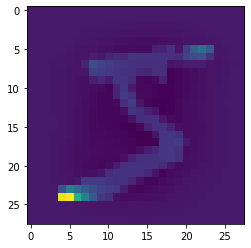

In [75]:
image = train_set_scaled[0]
image = image.reshape(28,28) 
plt.imshow(image)
plt.show()

In [76]:
train_set.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.0000,0.0,0.0,0.0,0.0


In [79]:
import pandas as pd
train_set_scaled = pd.DataFrame(train_set_scaled, columns=train_set.columns)
train_set_scaled.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,...,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,60000.0,60000.0,60000.0,60000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.592327e-18,-4.855375e-18,5.713948e-18,-1.835569e-18,-1.421085e-18,-2.486900e-18,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.317103e-02,-2.246288e-02,-1.606909e-02,-1.143220e-02,-9.007295e-03,-5.770394e-03,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.200296e+01,6.418128e+01,8.907405e+01,1.499806e+02,1.513374e+02,1.788764e+02,0.0,0.0,0.0,0.0


In [80]:
validation_predictions = cross_val_predict(estimator=sgd_clf,
                                            X=train_set_scaled,
                                            y=train_labels,
                                            cv=3)

In [81]:
# Higher precision & recall due to standerization
precision = precision_score(y_pred=validation_predictions, y_true=train_labels, average="macro")
recall = recall_score(y_pred=validation_predictions, y_true=train_labels, average="macro")
f1 = f1_score(y_pred=validation_predictions, y_true=train_labels, average="macro")

In [82]:
precision # 0.9058677582614747

0.9058677582614747

In [83]:
recall # 0.8958098878393358

0.8958098878393358

In [84]:
conf_matrix = confusion_matrix(y_pred=validation_predictions, y_true=train_labels)

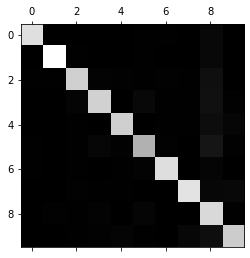

In [87]:
plt.matshow(conf_matrix, cmap=plt.cm.gray) # since the diagonal is bright, so it is really goood

# MultiLabel classification

In [88]:
y_big = (train_labels > 6)
y_even = (train_labels % 2 == 0)

In [93]:
y_multilabel = np.c_[y_big, y_even]

In [94]:
y_multilabel

array([[False, False],
       [False,  True],
       [False,  True],
       ...,
       [False, False],
       [False,  True],
       [ True,  True]])

In [95]:
# Not all calssifiers supports multilabels but KNeighbors do !
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier()

In [96]:
kneighbors.fit(train_set_scaled, y_multilabel)

KNeighborsClassifier()

In [97]:
kneighbors.predict(standerization.transform(some_samples))

array([[ True, False],
       [False,  True],
       [False, False],
       [False,  True],
       [False,  True]])

In [98]:
some_labels

60000    7
60001    2
60002    1
60003    0
60004    4
Name: class, dtype: uint8